In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/Farhanrolastgaming/Klasifikasi-Dataset/refs/heads/main/earthquake_alert_balanced_dataset.csv"
df = pd.read_csv(url)

# Ganti nama kolom
column_names_lama = ['magnitude', 'depth', 'cdi', 'mmi', 'sig','alert']
column_names_baru = ['Magnitudo', 'Kedalaman', 'CDI', 'MMI', 'SIG', 'Siaga']
rename_dict = dict(zip(column_names_lama, column_names_baru))
df = df.rename(columns=rename_dict)

# Mengubah kolom bertipe object ke numerik, kecuali 'Siaga'
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Siaga':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Atur urutan kategori manual untuk kolom Siaga
order_siaga = ['green', 'yellow', 'orange', 'red']
df['Siaga'] = pd.Categorical(df['Siaga'], categories=order_siaga, ordered=True)
df['Siaga_kode'] = df['Siaga'].cat.codes + 1
num_cols = df.select_dtypes(include=['float', 'int']).columns
df[num_cols] = df[num_cols].fillna(0)
for col in num_cols:
    df[col] = df[col].round(0).astype(int)

# Tampilkan data pertama
print("\nData Pertama: ")
print(df.head(15).to_string(index=False))

# Info dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek nilai kosong
print("\nNilai-nilai Kosong atau NaN:")
print(df.isnull().values.any())



Data Pertama: 
 Magnitudo  Kedalaman  CDI  MMI  SIG  Siaga  Siaga_kode
         7         14    8    7    0  green           1
         7         25    4    4  -33  green           1
         7        579    3    3  -13  green           1
         7         37    5    5   65  green           1
         7        624    0    2  -98  green           1
         7        660    4    3  -13  green           1
         7        630    1    3  -57  green           1
         7         20    7    6   29  green           1
         7         20    8    7 -101 yellow           2
         8         26    9    8    7 yellow           2
         7         10    9    9  119 yellow           2
         6         10    7    7  -12  green           1
         7        137    7    5   -7  green           1
         8        116    8    8  -59 yellow           2
         7         12    9    8   19 orange           3

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to


Akurasi Model Klasifikasi Gempa: 87.31%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.90      0.83      0.86        65
           2       0.84      0.80      0.82        65
           3       0.85      0.94      0.89        65
           4       0.91      0.92      0.92        65

    accuracy                           0.87       260
   macro avg       0.87      0.87      0.87       260
weighted avg       0.87      0.87      0.87       260



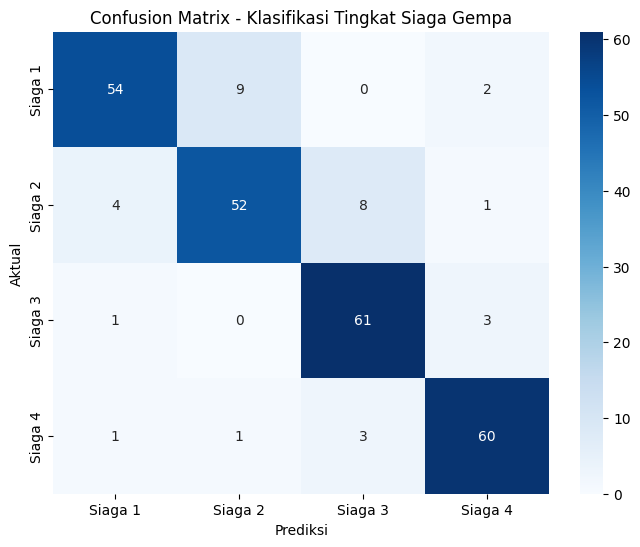

In [ ]:
X = df.drop(columns=['Siaga', 'Siaga_kode'])
y = df['Siaga_kode']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Membuat dan Melatih Model
model_gempa = RandomForestClassifier(n_estimators=100, random_state=42)
model_gempa.fit(X_train, y_train)

# Membuat Prediksi & Evaluasi
y_pred_gempa = model_gempa.predict(X_test)
accuracy_gempa = accuracy_score(y_test, y_pred_gempa)
print(f"\nAkurasi Model Klasifikasi Gempa: {accuracy_gempa:.2%}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_gempa))

# Visualisasi Confusion Matrix
cm_gempa = confusion_matrix(y_test, y_pred_gempa)
labels = ['Siaga 1', 'Siaga 2', 'Siaga 3', 'Siaga 4']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gempa, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Klasifikasi Tingkat Siaga Gempa')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()